In [16]:
import os

print("Current working directory:", os.getcwd())
print("Files in the current directory:", os.listdir(os.getcwd()))

Current working directory: C:\Users\91702
Files in the current directory: ['.cache', '.eclipse', '.ipynb_checkpoints', '.ipython', '.jmc', '.jupyter', '.keras', '.m2', '.matplotlib', '.nbi', '.VirtualBox', '.vscode', '3D Objects', 'ADD.java', 'anaconda3', 'API_SP.POP.TOTL_DS2_en_csv_v2_412736.csv', 'AppData', 'Application Data', 'AppMods', 'archive (2)', 'Bug Hunting', 'Contacts', 'Cookies', 'data.csv', 'Desktop', 'dilb_venv', 'Documents', 'DogsDataset.py', 'Downloads', 'EXP11.ipynb', 'EXPERIMENT 1.ipynb', 'Favorites', 'java', 'kaggle.json', 'keras_model.h5.ipynb', 'Lab Details.ipynb', 'linear.ipynb', 'Links', 'Local Settings', 'MediaGet2', 'Menu driven program.ipynb', 'ML 10.ipynb', 'mnist.ipynb', 'Music', 'My Documents', 'NetHood', 'next24tech Task-1.ipynb', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{d6ec41f2-d54a-11ed-adc0-d1db169552b8}.TM.blf', 'NTUSER.DAT{d6ec41f2-d54a-11ed-adc0-d1db169552b8}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{d6ec41f2-d

Number of rows: 9551
Number of columns: 21

Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


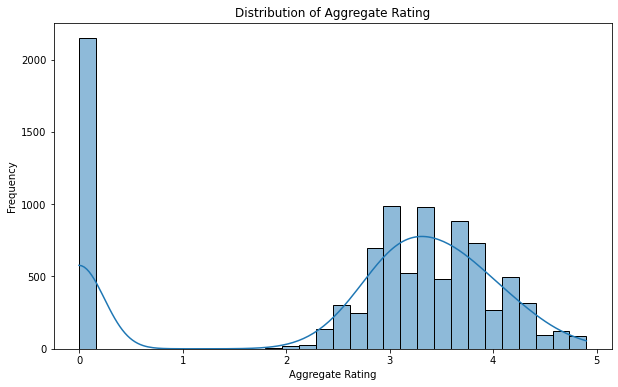


Class distribution of Aggregate Rating:
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


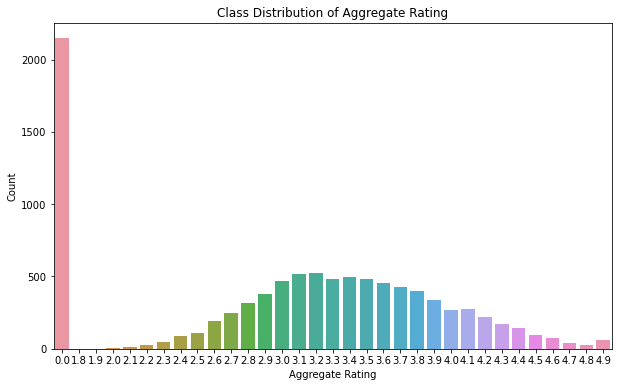

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\91702\Dataset .csv'

try:

    df = pd.read_csv(file_path)
    
    num_rows, num_columns = df.shape
    print(f"Number of rows: {num_rows}")
    print(f"Number of columns: {num_columns}")

    missing_values = df.isnull().sum()
    print("\nMissing values in each column:")
    print(missing_values)

    df = df.dropna(subset=['Aggregate rating'])
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            if df[column].dtype == 'object':
                df[column] = df[column].fillna(df[column].mode()[0])
            else:
                df[column] = df[column].fillna(df[column].median())

    plt.figure(figsize=(10, 6))
    sns.histplot(df['Aggregate rating'], bins=30, kde=True)
    plt.title('Distribution of Aggregate Rating')
    plt.xlabel('Aggregate Rating')
    plt.ylabel('Frequency')
    plt.show()

    class_counts = df['Aggregate rating'].value_counts()
    print("\nClass distribution of Aggregate Rating:")
    print(class_counts)

    plt.figure(figsize=(10, 6))
    sns.countplot(x='Aggregate rating', data=df)
    plt.title('Class Distribution of Aggregate Rating')
    plt.xlabel('Aggregate Rating')
    plt.ylabel('Count')
    plt.show()

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please verify that the file path is correct and the file exists at the specified location.")
except Exception as e:
    print(f"An error occurred: {e}")
